# Deep Neural Network

손글씨 모델링의 문제점

1. 원 데이터는 2차원이나 실제 모델은 1차원을 입력받는다. 따라서 변환을 해줘야한다. reshape()
2. 우리는 X만 가지고 있다. y는 어디에? 정답을 따로 가지고 있어야 한다. label data

DNN 모델의 문제는 input shape가 1차원 밖에 안된다.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

## MNIST Data_Set Load & Review

### 1) Load MNIST Data_Set

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### 2) visualization

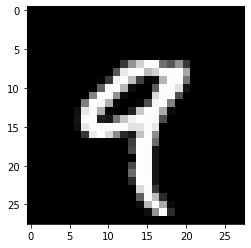

In [ ]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit,cmap='gray')
plt.show()

In [ ]:
import numpy as np
np.set_printoptions(linewidth=150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

##  데이터 전처리

### Reshape and Nomalization

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train = X_train.reshape((60000,28*28))
X_test = X_test.reshape((10000,28*28))

X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [ ]:
X_train=X_train.astype(float)/255
X_test=X_test.astype(float)/255

### 2) One Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## MNIST keras modeling

### 1) Model Define

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Sequential은 레이어의 선형 스택을 tf.keras.Model로 그룹화합니다. 
# Sequential은 이 모델에 대한 학습 및 추론 기능을 제공합니다.

mnist = models.Sequential()

mnist.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
mnist.add(layers.Dense(256,activation='relu'))
mnist.add(layers.Dense(10,activation='softmax'))

In [ ]:
# 모델의 구조 확인
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### 2) Model Compile

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
%%time
# 60000*0.8/128=375
Hist_mnist = mnist.fit(X_train,y_train,
                 epochs = 100,
                 batch_size=128,
                 validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 5s 5ms/step - loss: 0.2599 - accuracy: 0.9250 - val_loss: 0.1402 - val_accuracy: 0.9592
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0931 - accuracy: 0.9720 - val_loss: 0.0947 - val_accuracy: 0.9704
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0590 - accuracy: 0.9812 - val_loss: 0.1058 - val_accuracy: 0.9693
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0400 - accuracy: 0.9881 - val_loss: 0.0805 - val_accuracy: 0.9767
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0799 - val_accuracy: 0.9794
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0833 - val_accuracy: 0.9785
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.1147 - val_accuracy: 0.9722

### 4) 학습결과 시각화 - overfitting
- Loss Visualization

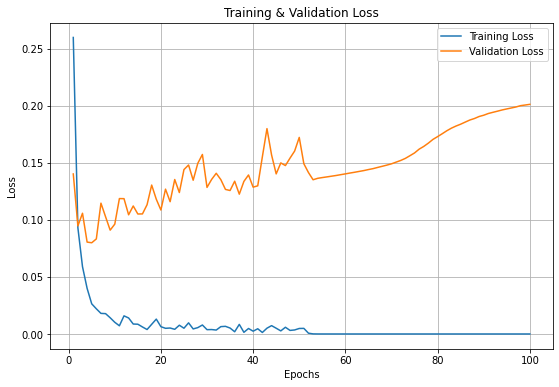

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1,len(Hist_mnist.history['loss'])+1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

### 5) Model Evaluate
- Loss & Accuracy

In [ ]:
loss, accuracy = mnist.evaluate(X_test,y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1510 - accuracy: 0.9851
Loss = 0.15096
Accuracy = 0.98510


### 6) Model Predicttion
- Probablity

In [ ]:
np.set_printoptions(suppress=True,precision=9)

print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
print(mnist.predict_classes(X_test[:1,:]))

[7]


## keras Modeling - Categorical Classification
- overfitting issues

 train_loss 와 validation_loss 의 차이가 크게 발생
 
 발생원인
 1. 학습데이터 부족
 2. 모델의 capacity가 너무 높음
> 파라미터가 너무 많거나 복잡한 경우
 
언더피팅은 트레이닝과 테스트 모두 안좋아짐

2번의 해결책

1) model의 capacity 감소전략 
 
 > 파라미터의 개수를 줄여라! ->
 > 히든레이어와 파라미터의 개수를 줄인다

 큰 모델을 만들어 놓고 점차 축소시켜 간략하게 만든다. 
 혹은 작은 모델을 만들고 점차 키워간다. 
 
 2) L2 Regularization 
 
  규제화: 강제로 규제를 강해서 학습을 방해한다. 
  
  $mean(y-\hat y)^2 + \alpha*\sum(w)^2$ -> L2
  
  or 

  $mean(y-\hat y)^2 + \alpha*\sum |w|$ -> L1

  충분히 학습이 되지 않을 수 있어 크게 봤을때 모델의 성능에 부정적인 영향을 미친다. 그러나 오버피팅 이슈를 피할 수 있다. 일반화된 모델을 만들기 위해서 감수

3) Dropout

 학습과정에서 일부 출력 네트워크를 무작위로 끊어버린다. 

 ` mnist.add(layers.Dropout(0.2))`

 L2와 마찬가지로 성능은 떨어지게 된다. 그러나 파라미터는 줄어들지 않는다. 

4) Batch nomalization

정규화된 체로 들어갔지만 레이어를 지나면서 데이터의 분포가 바뀌게 된다. 그래서 중간마다 스케일링(표준화)을 하는 것을 batch normalization이라 한다. 

`mnist.add(layer.BatchNomalization)`

`mnist.add(activation='reru')`

파라미터를 줄이지 않고 학습할 수 있다. capacity를 떨어틀이지 않는다. 

## L2

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Sequential은 레이어의 선형 스택을 tf.keras.Model로 그룹화합니다. 
# Sequential은 이 모델에 대한 학습 및 추론 기능을 제공합니다.

mnist = models.Sequential()

mnist.add(layers.Dense(512,activation='relu',
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape=(28*28,)))
mnist.add(layers.Dense(256,activation='relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
mnist.add(layers.Dense(10,activation='softmax'))

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
%%time
# 60000*0.8/128=375
Hist_mnist = mnist.fit(X_train,y_train,
                 epochs = 100,
                 batch_size=128,
                 validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2593 - accuracy: 0.9265 - val_loss: 0.1657 - val_accuracy: 0.9517
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1035 - accuracy: 0.9715 - val_loss: 0.1064 - val_accuracy: 0.9703
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0694 - accuracy: 0.9818 - val_loss: 0.0979 - val_accuracy: 0.9742
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0519 - accuracy: 0.9876 - val_loss: 0.0974 - val_accuracy: 0.9747
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0415 - accuracy: 0.9908 - val_loss: 0.0934 - val_accuracy: 0.9771
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0365 - accuracy: 0.9925 - val_loss: 0.0956 - val_accuracy: 0.9762
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0309 - accuracy: 0.9946 - val_loss: 0.1003 - val_accuracy: 0.9779

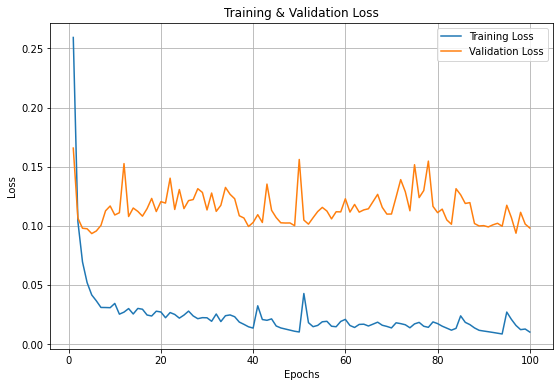

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1,len(Hist_mnist.history['loss'])+1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [ ]:
loss, accuracy = mnist.evaluate(X_test,y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

## Dropout

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Sequential은 레이어의 선형 스택을 tf.keras.Model로 그룹화합니다. 
# Sequential은 이 모델에 대한 학습 및 추론 기능을 제공합니다.

mnist = models.Sequential()

mnist.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256,activation='relu',))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10,activation='softmax'))

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
%%time
# 60000*0.8/128=375
Hist_mnist = mnist.fit(X_train,y_train,
                 epochs = 100,
                 batch_size=128,
                 validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3366 - accuracy: 0.8985 - val_loss: 0.1332 - val_accuracy: 0.9588
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1449 - accuracy: 0.9560 - val_loss: 0.0948 - val_accuracy: 0.9705
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1103 - accuracy: 0.9667 - val_loss: 0.0834 - val_accuracy: 0.9743
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0878 - accuracy: 0.9727 - val_loss: 0.0898 - val_accuracy: 0.9723
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0768 - accuracy: 0.9754 - val_loss: 0.0797 - val_accuracy: 0.9768
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0640 - accuracy: 0.9794 - val_loss: 0.0750 - val_accuracy: 0.9777
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0551 - accuracy: 0.9827 - val_loss: 0.0721 - val_accuracy: 0.9798

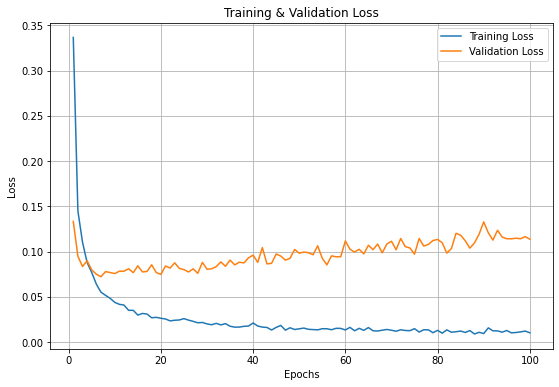

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1,len(Hist_mnist.history['loss'])+1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [ ]:
loss, accuracy = mnist.evaluate(X_test,y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1033 - accuracy: 0.9838
Loss = 0.10332
Accuracy = 0.98380


## Batch Normalization

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Sequential은 레이어의 선형 스택을 tf.keras.Model로 그룹화합니다. 
# Sequential은 이 모델에 대한 학습 및 추론 기능을 제공합니다.

mnist = models.Sequential()

mnist.add(layers.Dense(512,input_shape=(28*28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10,activation='softmax'))

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
%%time
# 60000*0.8/128=375
Hist_mnist = mnist.fit(X_train,y_train,
                 epochs = 100,
                 batch_size=128,
                 validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.1936 - accuracy: 0.9427 - val_loss: 0.1281 - val_accuracy: 0.9601
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0732 - accuracy: 0.9785 - val_loss: 0.1036 - val_accuracy: 0.9681
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0437 - accuracy: 0.9872 - val_loss: 0.0946 - val_accuracy: 0.9709
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0300 - accuracy: 0.9910 - val_loss: 0.0786 - val_accuracy: 0.9776
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.0858 - val_accuracy: 0.9763
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.0856 - val_accuracy: 0.9760
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0910 - val_accuracy: 0.9768

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1,len(Hist_mnist.history['loss'])+1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [ ]:
loss, accuracy = mnist.evaluate(X_test,y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1070 - accuracy: 0.9826
Loss = 0.10704
Accuracy = 0.98260


## L2+ Dropout

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Sequential은 레이어의 선형 스택을 tf.keras.Model로 그룹화합니다. 
# Sequential은 이 모델에 대한 학습 및 추론 기능을 제공합니다.

mnist = models.Sequential()

mnist.add(layers.Dense(512,activation='relu',input_shape=(28*28,),
                       kernel_regularizer = regularizers.l2(0.00001)))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256,activation='relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10,activation='softmax'))

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
%%time
# 60000*0.8/128=375
Hist_mnist = mnist.fit(X_train,y_train,
                 epochs = 100,
                 batch_size=128,
                 validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.3432 - accuracy: 0.8991 - val_loss: 0.1467 - val_accuracy: 0.9597
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1560 - accuracy: 0.9554 - val_loss: 0.1114 - val_accuracy: 0.9688
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1211 - accuracy: 0.9664 - val_loss: 0.1025 - val_accuracy: 0.9732
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0986 - accuracy: 0.9731 - val_loss: 0.0981 - val_accuracy: 0.9743
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0904 - accuracy: 0.9749 - val_loss: 0.0916 - val_accuracy: 0.9773
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0807 - accuracy: 0.9782 - val_loss: 0.0937 - val_accuracy: 0.9787
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0728 - accuracy: 0.9816 - val_loss: 0.0935 - val_accuracy: 0.9790

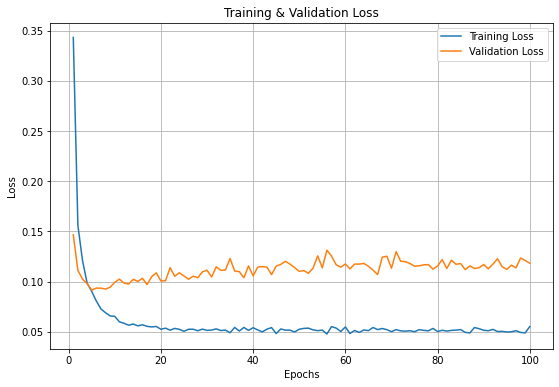

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1,len(Hist_mnist.history['loss'])+1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [ ]:
loss, accuracy = mnist.evaluate(X_test,y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1107 - accuracy: 0.9831
Loss = 0.11069
Accuracy = 0.98310


## L2+ Batch

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Sequential은 레이어의 선형 스택을 tf.keras.Model로 그룹화합니다. 
# Sequential은 이 모델에 대한 학습 및 추론 기능을 제공합니다.

mnist = models.Sequential()

mnist.add(layers.Dense(512,input_shape=(28*28,),
                       kernel_regularizer = regularizers.l2(0.00001)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256,
                       kernel_regularizer = regularizers.l2(0.00001)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10,activation='softmax'))

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
%%time
# 60000*0.8/128=375
Hist_mnist = mnist.fit(X_train,y_train,
                 epochs = 100,
                 batch_size=128,
                 validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.2010 - accuracy: 0.9437 - val_loss: 0.1233 - val_accuracy: 0.9646
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0798 - accuracy: 0.9788 - val_loss: 0.1000 - val_accuracy: 0.9731
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0555 - accuracy: 0.9861 - val_loss: 0.1065 - val_accuracy: 0.9712
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0390 - accuracy: 0.9913 - val_loss: 0.0903 - val_accuracy: 0.9771
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0331 - accuracy: 0.9932 - val_loss: 0.0906 - val_accuracy: 0.9772
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0316 - accuracy: 0.9934 - val_loss: 0.1050 - val_accuracy: 0.9741
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0289 - accuracy: 0.9944 - val_loss: 0.1010 - val_accuracy: 0.9756

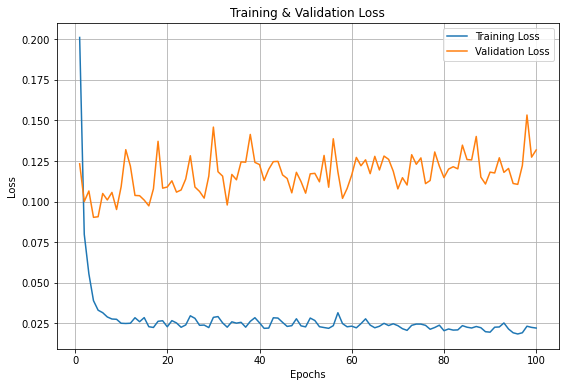

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1,len(Hist_mnist.history['loss'])+1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [ ]:
loss, accuracy = mnist.evaluate(X_test,y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9815
Loss = 0.10986
Accuracy = 0.98150


## Dropout + Batch

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Sequential은 레이어의 선형 스택을 tf.keras.Model로 그룹화합니다. 
# Sequential은 이 모델에 대한 학습 및 추론 기능을 제공합니다.

mnist = models.Sequential()

mnist.add(layers.Dense(512,input_shape=(28*28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10,activation='softmax'))

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
%%time
# 60000*0.8/128=375
Hist_mnist = mnist.fit(X_train,y_train,
                 epochs = 100,
                 batch_size=128,
                 validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.3083 - accuracy: 0.9069 - val_loss: 0.1408 - val_accuracy: 0.9566
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1469 - accuracy: 0.9554 - val_loss: 0.0940 - val_accuracy: 0.9707
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1111 - accuracy: 0.9653 - val_loss: 0.0866 - val_accuracy: 0.9737
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0926 - accuracy: 0.9704 - val_loss: 0.0781 - val_accuracy: 0.9768
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0786 - accuracy: 0.9752 - val_loss: 0.0715 - val_accuracy: 0.9795
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0709 - accuracy: 0.9772 - val_loss: 0.0775 - val_accuracy: 0.9766
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0616 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9800

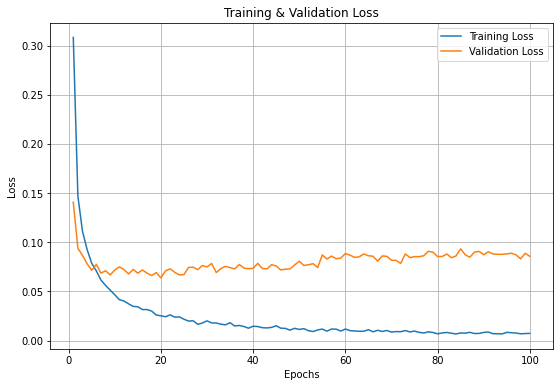

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1,len(Hist_mnist.history['loss'])+1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [ ]:
loss, accuracy = mnist.evaluate(X_test,y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.0756 - accuracy: 0.9856
Loss = 0.07562
Accuracy = 0.98560
